# **Deep Zork**
***

Can a machine learn to play a text-based game?

## Abstract

Neural networks such DQNs have proven to be successful in applications involve visual data but do not perform as well processing language data. Teaching an AI to play text-based games successfully and consistently would be a significant milestone in the field. This project seeks to explore the application of reinforcement learning on text-based games in hopes of advancing research on the topic. This project focuses solely on a single game with hopes of future application across many games. The results of the experimentation done in this project are a ways off from the ultimate end goal of a text-based game playing AI,  but show promising results and offer new insights.

<img src='zork_box_art.jpg'/>

## Project Motivation
***
Advancement in machine learning involving reinforcement learning has seen the rise of AIs capable of playing video games and outperforming human players. These include all sorts of games from chess and Go to Atari games. All of these instances involve games in which gameplay is based on visuals. Using convolutional neural networks, machines become quite capable of recognizing patterns in changing pixels on a screen and can react in real-time in order to win. 

Enter text-based games.

Also known as interactive fiction games, text-based games were some of the first ever computer games due to relying solely on text for gameplay and not needing to process graphics. They rely on language parsing text commands given by the player in response to changing descriptions of the player's environment. 

This presents a whole different type of problem for AIs attempting to play one of these games. In text-based games, reaction time is not a factor. Instead, the player must have an understanding of the language used and to be able to make smart decisions based off of subtle hints in the game's descriptions.

For example, if a game tells the player that, to the north lies a monster that will kill the player if they head that direction, the player should know not to go that way.

There have been some attempts at teaching machines to play text-based games with a key example being __TextWorld__ by Microsoft with variable success. There is still, however, a long way to go before an interactive fiction AI will perform at the level of AlphaGo or AlphaZero.

This project will aide in tackling the issue by focusing on teaching a machine to play one single game - Zork - in hopes that the techniques used can be applied to other games in the future. 


## About Zork
***
### History
***
One of the most classic and well-known text-based game, Zork I (also known as Zork: The Great Underground Empire), was written in the late 1970s. At the time it was well-revered for its compelling story-telling and also its language parsing engines which allowed players to use not only simple commands ('Attack monster') but more complex ones with prepositions ('Attack the monster with the sword'). It was one of the most successful works of interactive fiction and its legacy is still alive today with many elements still being used in newer works

### Plot
***
Zork is first and foremost an adventure game. The ultimate goal of the game is to collect all 19 different treasures and install them in a trophy case. To do so, the player must explore all areas of the game, including a sprawling underground dungeon.

### Map
***
Below are two maps of the Zork world - above and below ground. As you can see it's a very large map with many different rooms and paths between them. Note that the player always starts at **West of House** on the above ground map.


<img src='zork_map_1.gif'/> <img src='zork_map_2.gif'/>

## Prework
***
### Commands
There are three types of commands used in Zork.

1) Basic commands - commands to go a certain direction, commands to get info
        - Go north, go south
        - Look, check inventory
2) Verb-Object commands - commands that consist of a verb and a noun or noun phrase
        - Take key, open the door
3) Verb-Object-Prep-Object commands - commands that consist of a verb and noun phrase followed by a preposition and second noun phrase
        - Attack the monster with the sword, unlock the chest with the key
    
The objects in these commands can be gathered from the descriptions in-game. The verbs however need to be provide beforehand.

### Verb dictionary

To generate a list of possible verbs used in commands, info from the game file itself was gathered using ZTools (https://www.inform-fiction.org/zmachine/ztools.html).
The text was processed using Matcher and POS from the <b>spacy</b> library to find all the possible verbs and verb phrases. This can be seen in the ZorkVerbs notebook.

This list was then manually picked through to remove commands that would not influence gameplay (commands that save the game, change the text descriptions, etc.)

Also, for the 2nd type of commands, the noun phrase was replaced with 'OBJ' and for the 3rd type of commands the first noun phrases were replaced with 'OBJ' and the second with 'DCT' to allow for easy substitution of nouns.

The commands were then combined into a <i>commands</i> class and stored in a seperate script file (game_commands.py). The lists can be seen below.

In [98]:
from game_commands import commands
cmd = commands()

In [11]:
## Basic commands
cmd.basic_actions

['go north',
 'go south',
 'go west',
 'go east',
 'go northeast',
 'go northwest',
 'go southeast',
 'go southwest',
 'd',
 'u']

In [7]:
## Verb-object commands
cmd.command1_actions

['open OBJ',
 'get OBJ',
 'set OBJ',
 'hit OBJ',
 'eat OBJ',
 'put OBJ',
 'cut OBJ',
 'dig OBJ',
 'ask OBJ',
 'fix OBJ',
 'make OBJ',
 'wear OBJ',
 'move OBJ',
 'kick OBJ',
 'kill OBJ',
 'find OBJ',
 'play OBJ',
 'feel OBJ',
 'hide OBJ',
 'read OBJ',
 'fill OBJ',
 'flip OBJ',
 'burn OBJ',
 'pick OBJ',
 'pour OBJ',
 'pull OBJ',
 'apply OBJ',
 'leave OBJ',
 'ask OBJ',
 'break OBJ',
 'enter OBJ',
 'curse OBJ',
 'shake OBJ',
 'burn OBJ',
 'inflate OBJ',
 'brandish OBJ',
 'donate OBJ',
 'squeeze OBJ',
 'attach OBJ',
 'find OBJ',
 'banish OBJ',
 'read OBJ',
 'enchant OBJ',
 'feel OBJ',
 'pour OBJ']

In [8]:
## Verb-object-prep-object commands
cmd.command2_actions

['pour OBJ on DCT',
 'hide OBJ in DCT',
 'pour OBJ in DCT',
 'move OBJ in DCT',
 'hide OBJ on DCT',
 'flip OBJ for DCT',
 'fix OBJ with DCT',
 'spray OBJ on DCT',
 'dig OBJ with DCT',
 'cut OBJ with DCT',
 'pick OBJ with DCT',
 'squeeze OBJ on DCT',
 'pour OBJ from DCT',
 'fill OBJ with DCT',
 'brandish OBJ at DCT',
 'burn OBJ with DCT',
 'flip OBJ with DCT',
 'read OBJ with DCT',
 'hide OBJ under DCT',
 'carry OBJ from DCT',
 'inflate OBJ with DCT',
 'unlock OBJ with DCT',
 'give OBJ to DCT',
 'carry OBJ to DCT',
 'spray OBJ with DCT']

### Command likelihood
***
When the nouns from the game's descriptions are substituted into the above commands, certain combinations might not make much sense. For example, if there is a door and a table in the environment, the command "cut the door with the key" would not make any sense.

To help with this problem, walkthroughs and tutorials from other text-based games can be studied to have a way to determine the relevance and likelihood of different commands.

This can all be found in the scrape_tutorials notebook but the basic idea is that tutorials and walkthroughs from two databases - https://www.ifarchive.org/indexes/if-archive/solutions/ and http://www.textfiles.com/adventure/ were scraped using __urllib__ and __BeautifulSoup__ to get text files containing relevant commands for these games.

Those text files were then clean, preprocessed, and combined into one single file. The entire corpus was then ran through NLP using __spacy__.

To determine likelihood of command phrases, a Word2Vec model was used to determine the similarity score.

An example of this usage can be seen below.

In [148]:
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
f = open('tutorials_2.txt', 'r')
tutorials = f.read()
sentences = word_tokenize(tutorials)
w2v = Word2Vec([sentences])

In [149]:
w2v.wv.similarity('open', 'table')

0.23710659

In [150]:
w2v.wv.similarity('open', 'chest')

0.98167264

In [151]:
w2v.wv.similarity(word_tokenize('unlock tree with'), 'key').mean()

0.38991055

In [152]:
w2v.wv.similarity(word_tokenize('unlock door with'), 'key').mean()

0.4937261

To give an idea of the size and complexity of this corpus of walkthroughs and tuturials, a TSNE plot can be seen below.

In [154]:
from sklearn.manifold import TSNE
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

C:\Users\sparr\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


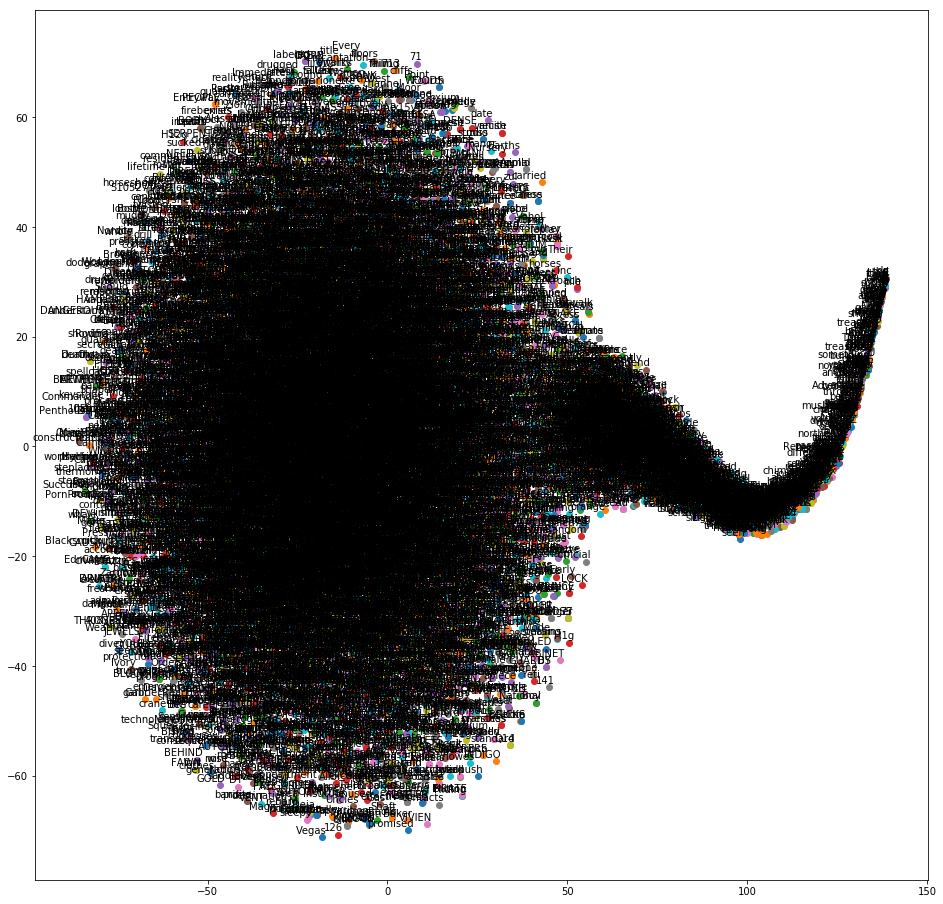

In [155]:
tsne_plot(w2v)

### Game emulation
***
The majority of text-based games can be played using Z-Machine data files (.z3, .z4, .z5, .z8). To play games with this file format there are several emulators for different systems. For Windows one of the best emulators is __Frotz__ (https://github.com/DavidGriffith/frotz).

Using __Popen__ in Python, a .exe version of the program can be used to play the Z-Machine games.

In order to read the printout line by line without blocking the program a seperate thread is used and the lines can be read through a queue. 

## Methodology 
***
### Reinforcement learning
***
![](rl_diagram2.jpg)



For any general reinforcement learning network, there must be an __agent__ which, given a game __state__,  chooses an __action__ which then interacts with the __enviornment__. The new __state__ along with a corresponding __reward__ are then passed back to the __agent__ which then adjusts its weights for future decisions.

### Environment
For this project, the environment is the __Zork 1__ game which connects to Python via __Popen__ in order to be able to write new commands and read the lines given by the game.

### State
The state consists of both the _surroundings_ in the game as well as the _inventory_ of the player. The combination of these two will provide all necessary information including relevant objects to interact with.

### Action
The action is chosen either randomly or by the agent. A value - _epsilon_ - is decayed by a small amount each turn. As its value gets closer to 0, a predicted action is more likely to be chosen. Thus, over time the agent will eventually always predict actions.

### Reward
The reward should influence "good" behaviour while penalizing "bad" behaviour by the agent. There is already an in-game score given to the player when reaching certain areas or performing certain actions. However additional rewards can help to direct the agent more successfully. 

One of the most important parts of playing a text-based game is _exploration_. Any human player playing Zork would need to take part in exploration of the various areas and rooms to learn more about the game world and to find essential items.

Another important part is finding, taking, and using _items_ in the game. For Zork especially, the main goal is to find and collect the various treasures so interacting with items should be rewarded. 

As far as negative rewards go, taking too many turns in a game usually is a bad thing as the goal should be to get to the end as quick as possible. Thus, a small negative reward can be given per each turn to help dissuade the agent from taking more turns than neccesary. 

Below are the different rewards.

__negative_per_turn_reward__ : -1 points
    - Each turn taken this reward will be added to the total reward for the round. This way, on turns where no other points were scored, the turn will be remembered as being non-productive. 
    
__new_area_reward__ : 2 points
    - Discovering a new area or room in the game should be rewarded in order to encourage exploration.
    
__moving_around_reward__: 0.5 points
    - In order to prevent the agent from staying in one room too long, a small positive reward is given each time the agent moves from one area to another that has already been visited. This also helps to encourage the agent to return to an area it previously left when it had not yet completed all objectives in that area. Providing this reward instead of the new_area_reward when the agent revisits an area will prevent it from exploiting the reward system and hopping back and forth between rooms.

__inventory_reward__ : 3 points
    - If the agent picks up an item or uses an item, the in-game inventory will change. This will be rewarded with a large number of points as finding the treasures of the game ultimately is how the agent can win. 
    
__inventory_not_new_reward__ : 0.5 points
    - In order to prevent the agent taking advantage of the large inventory_reward, a much smaller reward will be given when an inventory change occurs that has already taken place. This will prevent exploitable situations in which the agent repeatedly picks up and then drops an item.

__in_game_score_reward__ : in-game score
    - Scoring points in the game is the best type of action the agent could take so it should be rewarded the greatest. Each time an in-game score is granted, a weight (initially set at 10) will be applied to it to show its significance to the agent. 

### Agent
***
The __agent__ consists of a neural network - more specifically a Deep-Q Network (referred to as DQN). The architecture of the model can be seen below.

***

<img src='DDQN_model.png'/>

#### Input 
***
The model takes in the _state_ and performed _action_ as seperate inputs. The inputs are preprocessed (removing special characters, converting to lower-case) and tokenized using a keras tokenizer with a vocabulary size of 1200. The tokens are then padded to ensure a consistent length of 50.
#### Embedding
***
The _state_ and _action_ inputs are fed separately into a shared embedding layer with a dimension of 16. This layer is shared so that the vector for a word found in a _state_ will be the same vector if the word is in an _action_.
#### LSTM
***
The _state_ and _action_ embeddings are then sent to a long short-term memory or LSTM layer. This layer hopes to capture some of the time based features in the _states_ and _actions_. For example, if the state is "To the north lies a treasure chest and to the west there is a monster.", the model should be able to capture the signficance of the order of the description. The LSTM layer uses a dimension of 32.
#### Dense
*** 
The model passes the output from the LSTM layers to separate dense layers of dimension 8. The activation function used at this layer is 'tanh'.
#### Interaction
***
Lastly, to combine the dense _state_ and _action_ layers, a Dot layer is used to represent the condensed information of both inputs into a single value.
***

### Q-Learning
***
Q-learning allows an agent to make decisions based on future rewards. Instead of just picking the action that gives the highest reward for the current turn, Q-learning takes into account the future reward of the next state following an action as well.

Below is the formula for the Q-function.

<img src='q_formula.png'/>

The Q-value for each state, chosen action pair is calculated by taking the sum of the reward (rt) given and the maximum reward for the next state (maxQ(st+1,at+1)) multiplied by a discount rate (gamma).

### Experience replay
***
Instead of calculating and fitting the Q-value for each state-action pair as they occur, experience replay can be used to store each turn (state, action, reward, new state) in memory. Every so many turns then, a random sample from memory is chosen and trained upon. 

This tactic more closely mimics biological learning. It also decouples the temporal relationship between subsequent turns.

#### Prioritized replay
***
Turns with more positive outcomes are less common so to ensure that they are trained upon, a prioritize queue of positive experiences (score > 0) can be stored and selected from based on a _prioritized fraction_ when selecting a batch for training during experience replay.


### Double DQN 
***
Regular DQN have been shown to overestimate reward values over time and can become unstable. To combat this a __Double DQN (DDQN)__ can be used.

The main idea behind a DDQN is that instead of training and predicting on the same model, a secondary model is used for prediction while training on the main model. After so many rounds of training, the weights are then transferred from the main model to the secondary model. 

Since in the case of a text-based game, the state and action space is so large, using a DDQN can help slow down and stabilize training. 
*****

## Goals 
***
The following shows different checkpoints of performance of the AI in this project. These can be used to measure and judge the success of the AI.

__Level 0__: Able to play the game at a basic level.
    - The AI can process descriptions given by the game and generate likely actions from them.

__Level 1__: Able to navigate across various areas and rooms.
    - The AI can travel and discover new areas without getting stuck in one area for too long.

__Level 2__: Able to complete mini-quests.
    - The AI can complete simple tasks such as taking the egg from up in a tree in the forest and opening and entering the window into the house.

__Level 3__: Able to access the underground.
    - The AI can explore all areas above ground and find its way to the underground.

__Level 4__: Able to collect treasures.
    - The AI can find and gather more than one treasure without losing.

__Level 5__: Able to beat the game.
    - The AI can find all the treasures and win the game.
    
Note that these levels grow exponentially in difficulty and the biggest jump is from Level 4 to Level 5.

## Experimental Setup
***
__Epsilon decay:__ 0.9995

__Batch-size:__ 64

__Gamma:__ 0.75

__Prioritized fraction:__ 0.25



## Game flow
***
Below is the simplified flow for each game that is played.

__-- Intialize variables__

__-- Start game engine__

__-- For each turn:__
    
__1)__ Get state (surroundings + inventory)
    
__2)__ Choose action type (random v.s. predicted)
    
__3a)__ If random, select random weighted choice
    
__3b)__ If predicted, find action with max Q-value

__4)__ Perform selected action

__5)__ Get response, reward, and next state

__6)__ Save experience to memory

__7)__ If round % batch_size == 0, experience replay

__8)__ If last round, restart game

***
## Training Results
***
After training for 210 games consisting of 256 turns each, the results of both the AI as well as a dummy model which only chosen random actions can be seen below.


In [120]:
import matplotlib
import pandas as pd
%matplotlib inline

In [129]:
agent_scores = pd.read_csv('agent_game_scores.csv')
random_scores = pd.read_csv('random_game_scores.csv')

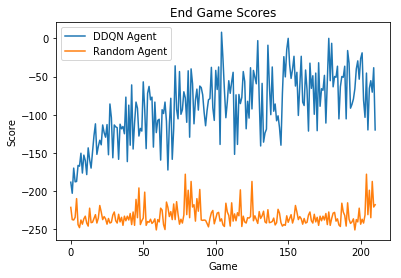

<Figure size 1440x1440 with 0 Axes>

In [131]:
ax = agent_scores.plot.line(y='Score', use_index=True)
random_scores.plot(ax=ax, y='Score', use_index=True, legend=True)
ax.legend(["DDQN Agent", "Random Agent"])
plt.xlabel('Game')
plt.ylabel('Score')
plt.title('End Game Scores')
plt.figure(figsize=(20,20))
plt.show()

As you can see, the AI greatly outperformed the random agent. However, even after over 200 games of training, the AI still fails to average over 0 total points in each game.
It is important to keep in mind though, that the score referred to in this chart is not the in-game score but instead the rewarded score.

In [165]:
stories.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Surroundings', 'Inventory', 'Action',
       'Response', 'Reward', 'Reward_Type', 'Score', 'Moves', 'Total_Moves'],
      dtype='object')

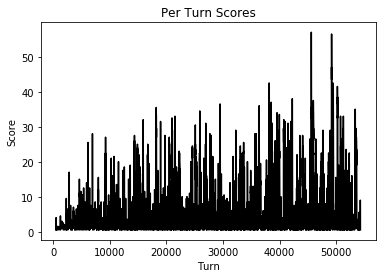

<Figure size 1440x1440 with 0 Axes>

In [172]:
stories = pd.read_csv('ddqn_stories.csv')

stories['Score'][stories['Score']>0].plot(c='black')
plt.xlabel('Turn')
plt.ylabel('Score')
plt.title('Per Turn Scores')
plt.figure(figsize=(20,20))
plt.show()

The above shows the score at the end of each turn when the score was above 0. With additional training, more scores over 0 occur.

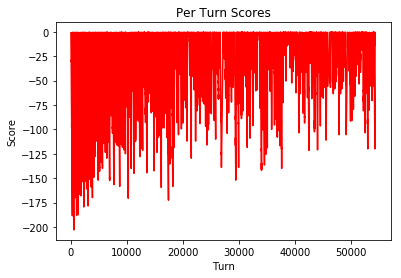

<Figure size 1440x1440 with 0 Axes>

In [171]:
stories = pd.read_csv('ddqn_stories.csv')

stories['Score'][stories['Score']<0].plot(c='red')
plt.xlabel('Turn')
plt.ylabel('Score')
plt.title('Per Turn Scores')
plt.figure(figsize=(20,20))
plt.show()

The above shows the score at the end of each turn when the score was below 0. With additional training, less scores below 0 occur.

The above is a graph of the reward for each turn taken by the AI. 

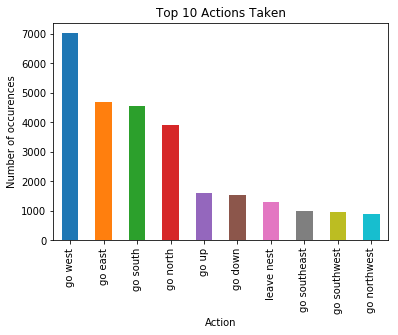

<Figure size 1440x1440 with 0 Axes>

In [175]:
stories.Action.value_counts()[0:10].plot(kind='bar')
plt.xlabel('Action')
plt.ylabel('Number of occurences')
plt.title('Top 10 Actions Taken')
plt.figure(figsize=(20,20))
plt.show()

In [181]:
stories.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Surroundings', 'Inventory', 'Action',
       'Response', 'Reward', 'Reward_Type', 'Score', 'Moves', 'Total_Moves'],
      dtype='object')

Above shows the top 10 most common actions taken. Nearly all of them are directional commands which is not surprising as moving around in the game is vital to scoring points. The only command in the top 10 which is not a directional command is the command 'leave nest'. This is equivalent to dropping the 'nest' which is a synonym for the 'egg' in the game. Dropping the egg or nest early on is actually an important step in scoring points for the item later on in the game.



## Results

In terms of scoring the performance of the AI against the previously mentioned goals, the AI is just shy of Level 3.

The AI is able to consistently complete the mini-quests of obtaining the egg from the tree in the forest as well as entering into the house. However, it still has not discovered one of the three passages to the underground.

## Conclusion

From the training so far, it would seem that an AI can be somewhat capable of playing a text-based game, albeit poorly in its current state. I believe that with additional training, the AI will certainly be able to progress to Level 3.

However, it’s hard to say how easily it would then be able to jump to Level 4 and begin obtaining the various treasures in the game. It is not too farfetched to believe it to be capable of that though, considering the fact that it was able to learn how to interact with both the egg in the tree and the window into the house.

## Future Work
***

Going forward, there is much that can be done to improve the performance of Deep Zork. Below is a list of all planned future work and investigation.

1. Computational overhead

Training on the game data was the most computationally expensive part of this project. Calculating the max possible Q value for each state involves a large amount of iterations.
Finding a way to cut down the action space size could be one way to improve the performance. Using a better method of predicting which commands are likely to be successful could speed up training by a large factor.
Another option would be to parallelize the training and separate it completely from playing the game. A large amount of game data could be collected and then all the training could take place across multiple threads or machines.

2. Reducing state space size

Because the state consists of the surroundings and the inventory and there are many items in the game, many combinations of surroundings and inventories can occur resulting in a very large state size. Currently the game stores all of these as separate states which leads to a rather large number of states.
Finding a way to combine similar states could reduce overall state space size.
Another option would be to feed the inventory and surroundings into the agent separately and create separate pipes for them within the model.

3. Reworking rewards

The reward values and conditions chosen were done so somewhat arbitrarily.
Different values for the rewards could be tested as well as removing or adding additional conditions.
The logic behind adding rewards for exploration and item interaction was to help the AI more quickly learn what it needed to do to beat the game. Although it might involve a longer training period, using only the in-game rewards could result in a better performance in the long run.

4. Network architecture

Using a DDQN might not be the optimal form of reinforcement learning for the task of playing text-based games.
More experimental networks could be tested and compared to the performance of the DDQN.
An ensemble of networks could also be tested and might provide a more robust solution.

5. Playing other games

Zork was chosen because it is one of the most well-known text-based games. However, it may not be the most friendly to reinforcement learning compared to other games.
Finding more, simpler interactive fiction games with smaller game maps could be tested. Creating an agent that can successfully play a simpler game could then be translated to more complex games.

## References
***

Ji He, Jianshu Chen, Xiaodong He, Jianfeng Gao, Lihong Li, Li Deng, and MariOstendorf.  Deep Reinforcement Learning with an Unbounded Action Space.CoRR, 2015. URL: http://arxiv.org/abs/1511.04636.

Karthik Narasimhan, Tejas D. Kulkarni, and Regina Barzilay.  Language Under-standing for Text-based Games Using Deep Reinforcement Learning, 2015. URL: http://arxiv.org/abs/1506.08941.

Zelinka Mikulaˇs. “Using Reinforcement Learning to Learnhow to Play Text-Based Games.” Charles University, 2017. URL: https://arxiv.org/pdf/1801.01999.

Matan Haroush, Tom Zahavy, Daniel J. Mankowitz, Shie Mannor. Learning How Not to Act in Text-based Games, 2018. URL: https://openreview.net/forum?id=B1-tVX1Pz.

Hado van Hasselt, Arthur Guez, David Silver. Deep Reinforcement Learning with Double Q-learning, 2015. URL: https://arxiv.org/abs/1509.06461.